In [53]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt

In [26]:
data=load_wine()
x=data.data
y=data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [67]:
clf_temp=SVC(kernel='linear')
grid1={"C":[1e2,1e3,1e4,5e3,1e4,1e5],"gamma":[1e-2,1e-3,5e-4,1e-4,5e-3]}
optimizer=GridSearchCV(clf_temp,grid1)

In [68]:
optimizer.fit(x_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [100.0, 1000.0, 10000.0, 5000.0, 10000.0,
                               100000.0],
                         'gamma': [0.01, 0.001, 0.0005, 0.0001, 0.005]})

In [69]:
optimizer.best_estimator_

SVC(C=100.0, gamma=0.01, kernel='linear')

In [71]:
clf1=SVC(C=100,gamma=0.01,kernel='linear')
clf1.fit(x_train,y_train)

SVC(C=100, gamma=0.01, kernel='linear')

In [24]:
clf2=DecisionTreeClassifier()
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
clf3=GaussianNB()
clf3.fit(x_train,y_train)

GaussianNB()

In [72]:
y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)
y_pred3=clf3.predict(x_test)

In [73]:
svc_acc=accuracy_score(y_test,y_pred1)
dt_acc=accuracy_score(y_test,y_pred2)
nb_acc=accuracy_score(y_test,y_pred3)
print("SVC accuracy",svc_acc)
print("DT accuracy",dt_acc)
print("NB accuracy",nb_acc)

SVC accuracy 0.9629629629629629
DT accuracy 0.9444444444444444
NB accuracy 0.9814814814814815


In [74]:
classifiers = ['SVC', 'DecisionTree', 'Naive Bayes']
accuracies = [svc_acc,dt_acc,nb_acc] 

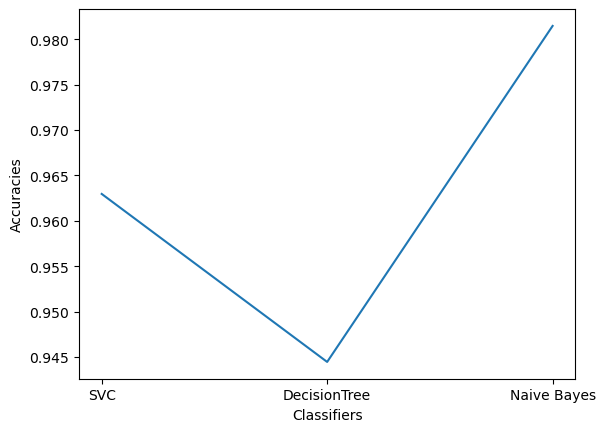

In [75]:
plt.plot(classifiers,accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracies')
plt.show()

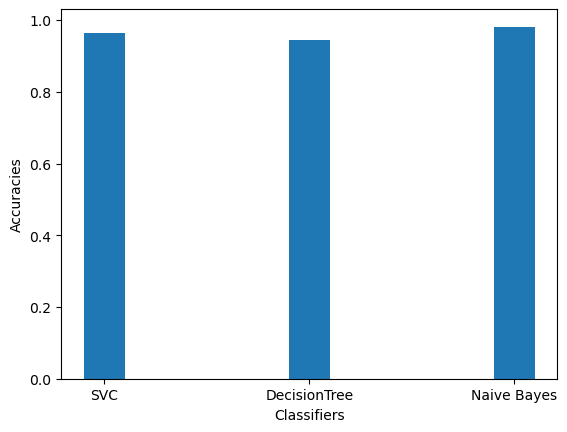

In [76]:
plt.bar(classifiers,accuracies,width=0.2)
plt.xlabel("Classifiers")
plt.ylabel("Accuracies")
plt.show()